In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
raw_data = pd.read_csv('AB_NYC_2019.csv')
raw_data.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
raw_data.nunique()
raw_data.isnull().sum()
raw_data.dtypes

Host Names Doesnt Do anything for us so we'll drop it along the host_id 

Question 1 : Different Hosts & Areas 


In [4]:
sns.countplot(x = raw_data["neighbourhood_group"], hue = raw_data["room_type"])

Q1_1 : 
we'll start by the grouped areas because they're easier to handle for now

In [5]:
fig, ax = plt.subplots(figsize=(8,8))

# Show Background image
img=plt.imread('New_York_City_.png', 0)
coors = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coors)

# Plotting
scatter_map = sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', s=10, ax=ax, data=raw_data)
plt.title('By Neighobourhood Groups')
plt.legend()
plt.show()

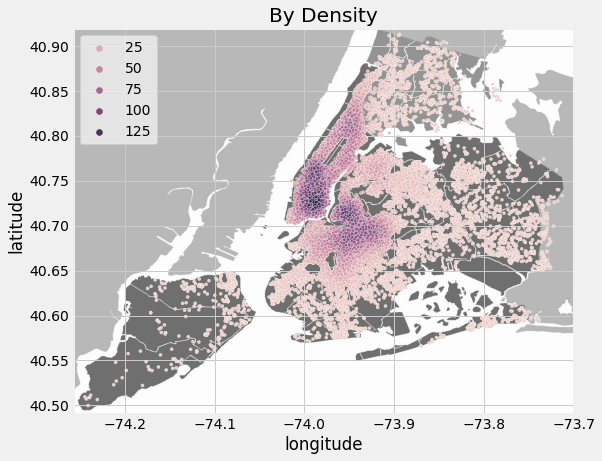

In [143]:
from scipy.stats import gaussian_kde

fig, ax = plt.subplots(figsize=(8,8))

# Calculate the point density
xy = np.vstack([raw_data.longitude, raw_data.latitude])
z = gaussian_kde(xy)(xy)
raw_data['density_of_loc'] = pd.Series(z)

# Show Background image
img=plt.imread('New_York_City_.png', 0)
coors = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coors)


sns.scatterplot(x=raw_data['longitude'], y=raw_data['latitude'], hue=z, s=10, ax=ax)
plt.title('By Density')
plt.legend()
plt.show()


In [7]:
from scipy.stats import gaussian_kde

fig, ax = plt.subplots(figsize=(8,8))

filter_amount_h = raw_data.price.mean() * 3
filter_amount_l = raw_data.price.mean() / 3
filtered_data = raw_data[raw_data.price < filter_amount_h]
filtered_data = filtered_data[filtered_data.price > filter_amount_l]

# Show Background image
img=plt.imread('New_York_City_.png', 0)
coors = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coors)


sns.scatterplot(x='longitude', y='latitude', hue='price', s=20, ax=ax, data=filtered_data)
plt.title('By Price')
plt.legend()
plt.show()


In [8]:
fig, ax = plt.subplots(figsize=(8,8))

# Show Background image
img=plt.imread('New_York_City_.png', 0)
coors = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coors)

# Plotting
scatter_map = sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood', s=10, ax=ax, data=raw_data)
plt.legend('.')
plt.title('Different Neighbourhood Groups')
plt.show()

In [9]:
sns.pairplot(raw_data.drop(['latitude','longitude', 'id', 'host_id'],axis=1))
sns.pairplot(raw_data.drop(['latitude','longitude', 'id', 'host_id'],axis=1), hue="neighbourhood_group")

In [183]:
from wordcloud import WordCloud

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(raw_data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:

n_clus = 16


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clus, random_state=0)
kmeans.fit(raw_data[['longitude', 'latitude']])

labels = kmeans.fit_predict(raw_data[['longitude', 'latitude']])



fig, ax = plt.subplots(figsize=(8,8))
# Show Background image
img=plt.imread('New_York_City_.png', 0)
coors = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coors)
sns.scatterplot(x='longitude', y='latitude', data=raw_data, hue=labels, palette=sns.color_palette("hls", n_clus), s=raw_data.price/3, ax=ax)
plt.title('All data clustered, hue is the clusters & size is the price')



#remapping
raw_data['geo_clustering'] = labels
new_indisec = raw_data.groupby('geo_clustering').price.mean().sort_values(ascending=False).index.tolist()
raw_data.geo_clustering = raw_data.geo_clustering.apply(lambda x : new_indisec.index(x) + 1)

print('Correllation of price and geo_clustered data of', n_clus, 'number of clusters is :', 
       raw_data[raw_data.price<raw_data.price.mean()*2].geo_clustering.corr(raw_data[raw_data.price<raw_data.price.mean()*2].price))
print('p_value of this correlation is : ', )
plt.legend('.')
plt.show()




In [11]:
raw_data.groupby('neighbourhood').price.mean().sort_values(ascending=False)[:20].plot(kind='bar')

for Q2 and the rest we might need some data cleaning



Null values to be handled :
- review_per_month nans = 0
- last_review = the starting date of our dataset

Some Cleaning Shit Before We Start
- uniques of minimum_night, review_numbers, calculated_host_listing_count can be reduced
- some features like id, host_id can be droped
- availability can be reduced uniqueness wise (we'll leave this for later)


For some additional Questions to be asked about data set we may ask these Qs : 
- applying some feature engineering on name column, is there any corelation with price, availability, etc.. ? 
- are those who have last_review of a long time ago, some kind of abandoned/out_of_date hotels and need to lower their prices ? (generally working on reviews)

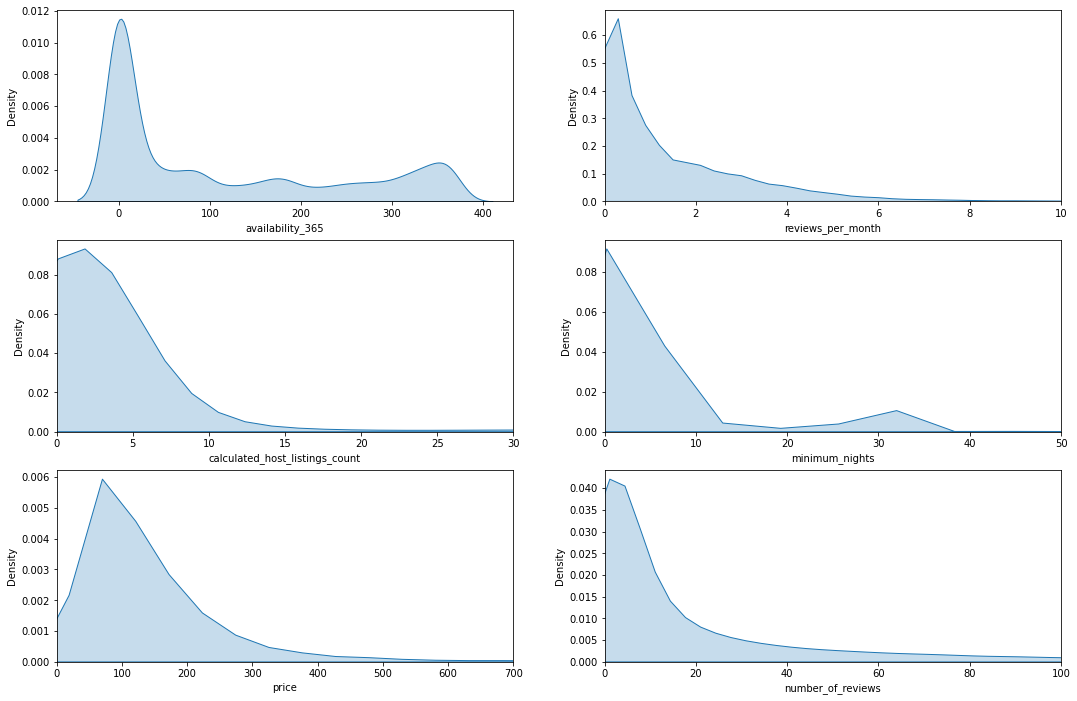

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

sns.kdeplot(raw_data.availability_365, shade=True, ax=axes[0][0], )
sns.kdeplot(raw_data.reviews_per_month, shade=True, ax=axes[0][1], ).set(xlim=(0, 10))
sns.kdeplot(raw_data.calculated_host_listings_count, shade=True, ax=axes[1][0], ).set(xlim=(0, 30))
sns.kdeplot(raw_data.minimum_nights, shade=True, ax=axes[1][1], ).set(xlim=(0, 50))
sns.kdeplot(raw_data.price, shade=True, ax=axes[2][0], ).set(xlim=(0, 700))
sns.kdeplot(raw_data.number_of_reviews, shade=True, ax=axes[2][1], ).set(xlim=(0, 100))

plt.show()

In [13]:
raw_data.last_review.fillna('1960-01-01', inplace=True)
raw_data.reviews_per_month.fillna(0, inplace=True)
df = raw_data.drop(['id', 'host_id', 'host_name', 'name', 'last_review'], axis=1)

# Doing Some Binning & Stuff ...
bins_1 = pd.IntervalIndex.from_tuples([(-1, 10), (10, 50), (50, 100), (100, 300), (300, 10000)])
df.availability_365 = pd.cut(df.availability_365, bins_1)

bins_2 = pd.IntervalIndex.from_tuples([(-1, .5), (.5, 1), (1, 2), (2, 4), (4, 10000)])
df.reviews_per_month = pd.cut(df.reviews_per_month, bins_2)

bins_3 = pd.IntervalIndex.from_tuples([(-1, 1), (1, 4), (4, 8), (8, 10000)])
df.calculated_host_listings_count = pd.cut(df.calculated_host_listings_count, bins_3)

bins_4 = pd.IntervalIndex.from_tuples([(-1, 1), (1, 3), (3, 7), (7, 14), (14, 24), (24, 10000)])
df.minimum_nights = pd.cut(df.minimum_nights, bins_4)

bins_5 = pd.IntervalIndex.from_tuples([(-1, 50), (50, 150), (150, 300), (300, 10000)])
df.price = pd.cut(df.price, bins_5)

bins_6 = pd.IntervalIndex.from_tuples([(-1, 5), (5, 10), (10, 30), (30, 10000)])
df.number_of_reviews = pd.cut(df.number_of_reviews, bins_6)


df.head()



,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,"(50, 150]","(-1, 1]","(5, 10]","(-1.0, 0.5]","(4, 8]","(300, 10000]"
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,"(150, 300]","(-1, 1]","(30, 10000]","(-1.0, 0.5]","(1, 4]","(300, 10000]"
2,Manhattan,Harlem,40.80902,-73.94190,Private room,"(50, 150]","(1, 3]","(-1, 5]","(-1.0, 0.5]","(-1, 1]","(300, 10000]"
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,"(50, 150]","(-1, 1]","(30, 10000]","(4.0, 10000.0]","(-1, 1]","(100, 300]"
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,"(50, 150]","(7, 14]","(5, 10]","(-1.0, 0.5]","(-1, 1]","(-1, 10]"


except for latitude and longtitude, others must be catagorized and then we can see a correlation map

we'll do on hot encoding with room type and ngh_group cuz they mean something beside of increasing values

In [14]:
dum_data = raw_data[['room_type', 'neighbourhood_group']]
dum_df = pd.get_dummies(dum_data, columns=["neighbourhood_group", "room_type"], prefix=["NGType_is", "RoomType_is"] )

dum_df['price'] = df['price']
plt.figure(figsize=(12, 12))
sns.heatmap(dum_df.corr(), annot=True, square=True, cmap='icefire')
plt.title('Price Heatmap according to roomType & neighbourhoodGroupType')

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# uncomment on use
ng_group = df.drop(['neighbourhood_group'], axis=1)
lat = df.drop(['latitude'], axis=1, inplace=True)
lon = df.drop(['longitude'], axis=1, inplace=True)
df.drop(['neighbourhood'], axis=1, inplace=True)
for col in df :    
    df[col] = label_encoder.fit_transform(df[col])
df.head()

In [16]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, square=True, cmap='icefire')

Q3
our main goal here is to undrestand the relationship of availability and other columns
some columns we may try by hand, and as for others we can use a decision tree to then realize which factors are involved in a higher availability

Corelation of density to availability ->  -0.12489576333891875


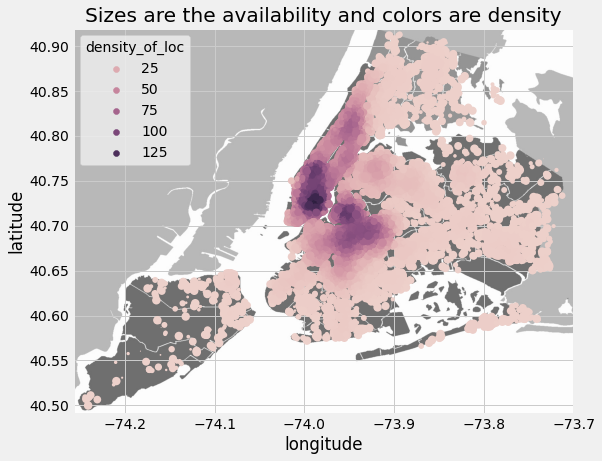

In [181]:

print('Corelation of density to availability -> ', raw_data.density_of_loc.corr(raw_data.availability_365))

fig, ax = plt.subplots(figsize=(8,8))
# Show Background image
img=plt.imread('New_York_City_.png', 0)
coors = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coors)
# centers = kmeans.cluster_centers_
sns.scatterplot(x='longitude', y='latitude', data=raw_data, hue=raw_data.density_of_loc, s=raw_data.availability_365/5, ax=ax)
plt.title('Sizes are the availability and colors are density')

plt.show()





In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood_group', y='availability_365', hue='room_type', data=raw_data)

In [19]:
groups = raw_data.groupby('neighbourhood').groups.keys()
corr_dict = {}
plt.figure(figsize=(10, 10))


for group in groups : 
    corr_dict[group] = raw_data.groupby('neighbourhood').get_group(group).corr().abs().sum().sum()


corr_dict = pd.Series(corr_dict)
corr_dict.sort_values(ascending=False)[:20].plot(kind='bar')
plt.xlabel('Neighbourhoods')
plt.ylabel('Sum of Correlation heatmap')


plt.figure(figsize=(12, 12))
sns.heatmap(raw_data.groupby('neighbourhood').get_group('Financial District').corr(), annot=True, square=True)

for your own sake, ddo not atempt to run these 2 cells below

In [ ]:
# # import warnings
# # warnings.filterwarnings('ignore')

# # from xgboost import XGBClassifier
# # from sklearn.metrics import accuracy_score
# # from sklearn.ensemble import RandomForestRegressor
# # from sklearn.linear_model import LinearRegression
# # from sklearn.neural_network import MLPClassifier
# # from sklearn.svm import SVR
# # from sklearn.ensemble import AdaBoostClassifier


# # model1 = XGBClassifier()
# # model1.fit(train_x, train_y)

# # model2 = RandomForestRegressor()
# # model2.fit(train_x,train_y)

# # model3 = LinearRegression()  
# # model3.fit(train_x, train_y)

# # model4 = MLPClassifier()
# # model4.fit(train_x, train_y)

# # model6 = SVR()
# # model6.fit(train_x, train_y)

# # model7 = AdaBoostClassifier()
# # model7.fit(train_x, train_y)


# # model_names = ['XGBoost', 'Random Forest', 'Linear Regressor', 'Artificial Neural Net', 'SVR', 'Ada Boost']
# # for i, ch in enumerate([model1, model2, model3, model4, model6, model7]) : 
# #     y_pred = ch.predict(test_x)
# #     predictions = [round(value) for value in y_pred]

# #     accuracy = accuracy_score(test_y, predictions)
# #     print(model_names[i], end=" --> ")
# #     print("Accuracy : %.2f%%" % (accuracy * 100.0))

[18:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost --> Accuracy : 54.22%
Random Forest --> Accuracy : 32.58%
Linear Regressor --> Accuracy : 19.32%
Artificial Neural Net --> Accuracy : 54.33%
SVR --> Accuracy : 45.54%
Ada Boost --> Accuracy : 53.84%


In [21]:
# # from sklearn.model_selection import train_test_split

# # x = df.drop(['availability_365'], axis=1)
# # y = df['availability_365']

# # train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=10)

# # model = AdaBoostClassifier()
# # model.fit(train_x, train_y)
# # print('Accuracy : ' + str(int(model.score(test_x, test_y)*100)) + '%') 


NameError: name 'AdaBoostClassifier' is not defined

Q4 - we do this by clusterng

In [153]:
# if u wnat to run this cell, uncomment the plot sections (3 sections) one by one to avoid confusion

google_meta_content_brooklyn_shops = "40.6101191%2C-73.920052%7C40.6530035%2C-73.8702547%7C40.684568%2C-73.976977%7C40.6909398%2C-73.9830629%7C40.683706%2C-73.97502%7C40.6257495%2C-73.9168292%7C40.5941828%2C-73.9998913%7C40.6592586%2C-74.0044387%7C40.7166535%2C-73.9592423%7C40.7033814%2C-73.9916008%"
google_meta_content_brooklyn_restaurants_cheap = "40.6101191%2C-73.920052%7C40.6530035%2C-73.8702547%7C40.684568%2C-73.976977%7C40.6909398%2C-73.9830629%7C40.683706%2C-73.97502%7C40.6257495%2C-73.9168292%7C40.5941828%2C-73.9998913%7C40.6592586%2C-74.0044387%7C40.7166535%2C-73.9592423%7C40.7033814%2C-73.9916008%"
google_meta_content_brooklyn_restaurants_expensive = "40.6101191%2C-73.920052%7C40.6530035%2C-73.8702547%7C40.684568%2C-73.976977%7C40.6909398%2C-73.9830629%7C40.683706%2C-73.97502%7C40.6257495%2C-73.9168292%7C40.5941828%2C-73.9998913%7C40.6592586%2C-74.0044387%7C40.7166535%2C-73.9592423%7C40.7033814%2C-73.9916008"

###################################################################### SHOP COORDS ######################################################################
def df_maker(raw_coords) : 
    raw_coords = raw_coords.split('7C')
    for i, c in enumerate(raw_coords) : 
        raw_coords[i] = raw_coords[i].split('-')
    
    cord_df = pd.DataFrame(raw_coords, columns=['lat', 'lon'])
    for col in cord_df.columns : 
        cord_df[col] = cord_df[col].apply(lambda x : float(x[:x.index('%')]))
    cord_df['lon'] = cord_df['lon'].apply(lambda x : -1 * x)
    return cord_df

coord_df_shops = df_maker(google_meta_content_brooklyn_restaurants_cheap)

# fig, ax = plt.subplots(figsize=(8,8))
# # Show Background image
# img=plt.imread('New_York_City_.png', 0)
# coors = [-74.258, -73.7, 40.49, 40.92]
# ax.imshow(img, zorder=0, extent=coors)
# # Plotting
# scatter_map = sns.scatterplot(x='lon', y='lat', s=100, ax=ax, data=coord_df_shops)
# plt.title('NY Shoping Centers')
# plt.show()
##########################################################################################################################################################





#################################################################### MUSUEM COORDS #######################################################################
museums_df = pd.read_csv('museums.csv')
museums_df.the_geom = museums_df.the_geom.apply(lambda x : x[7:-1].split(' '))
lons = museums_df.the_geom.apply(lambda x : float(x[0]))
lats = museums_df.the_geom.apply(lambda x : float(x[1]))
coords_df_museums = pd.DataFrame({'lat' : lats, 'lon' : lons})

# fig, ax = plt.subplots(figsize=(8,8))
# # Show Background image
# img=plt.imread('New_York_City_.png', 0)
# coors = [-74.258, -73.7, 40.49, 40.92]
# ax.imshow(img, zorder=0, extent=coors)
# # Plotting
# scatter_map = sns.scatterplot(x='lon', y='lat', s=100, ax=ax, data=coords_df_museums)
# plt.title('NY Museums')
# plt.show()
##########################################################################################################################################################




##################################################################### CONCESSIONS COORDS #################################################################
concessions = pd.read_json('concessions.json')
lats, lons = [], []

for i in range(len(concessions.locations)):
    try : 
        lats.append(float(concessions.locations[i]['location'][0]['lat']))
        lons.append(float(concessions.locations[i]['location'][0]['lng']))
    except : 
        lats.append(None)
        lons.append(None)

coords_df_concessions = pd.DataFrame({'lat' : lats, 'lon' : lons})
coords_df_concessions.dropna(inplace=True)
coords_df_concessions.lon = coords_df_concessions.lon.apply(lambda x : x if x <= -72 else -x)

# fig, ax = plt.subplots(figsize=(8,8))
# # Show Background image
# img=plt.imread('New_York_City_.png', 0)
# coors = [-74.258, -73.7, 40.49, 40.92]
# ax.imshow(img, zorder=0, extent=coors)
# # Plotting
# scatter_map = sns.scatterplot(x='lon', y='lat', s=100, ax=ax, data=coords_df_concessions)
# plt.title('NY Consessions')
# plt.show()
##########################################################################################################################################################

Concatenating all the coords from cell above and applying a clustering on them

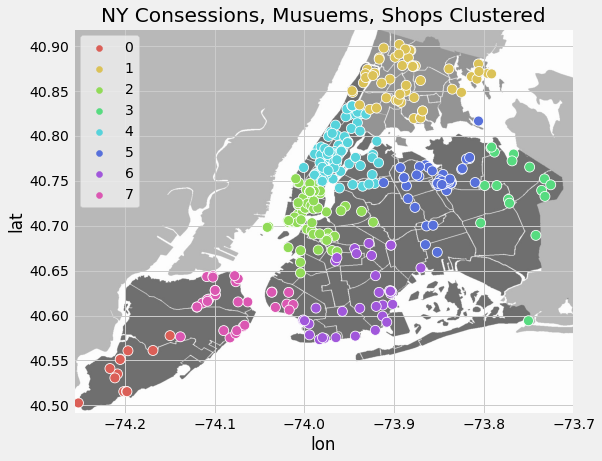

In [156]:
coords = pd.concat([coords_df_concessions, coords_df_museums, coord_df_shops])




from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(coords)

labels_coord_data = kmeans.fit_predict(coords)



fig, ax = plt.subplots(figsize=(8,8))
# Show Background image
img=plt.imread('New_York_City_.png', 0)
coors = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coors)
sns.scatterplot(x='lon', y='lat', data=coords, hue=labels_coord_data, palette=sns.color_palette("hls", 8), s=100, ax=ax)
plt.title('NY Consessions, Musuems, Shops Clustered')
plt.show()


Q4 - we correlate z(density of the hotels) and clusters of concession

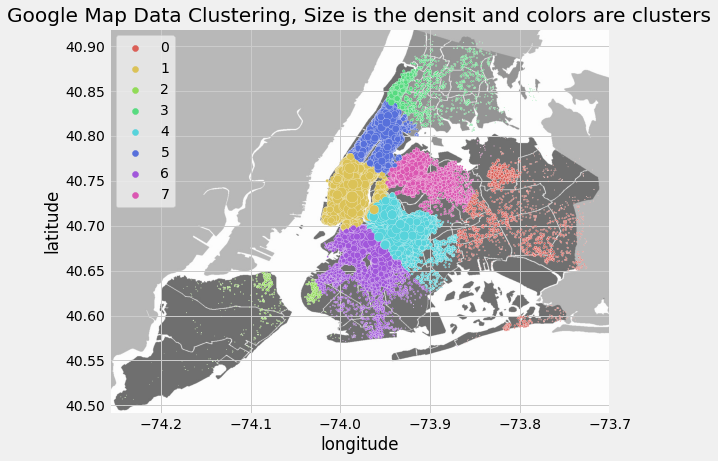

corelation of concession clusters and density is :  -0.8124226931143829


In [163]:
labels_raw_data = kmeans.fit_predict(raw_data[['longitude', 'latitude']])
raw_data['concession_clustering'] = labels_raw_data


fig, ax = plt.subplots(figsize=(8,8))
# Show Background image
img=plt.imread('New_York_City_.png', 0)
coors = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coors)
# centers = kmeans.cluster_centers_
sns.scatterplot(x='longitude', y='latitude', data=raw_data, hue=labels_raw_data, palette=sns.color_palette("hls", 8), s=raw_data.density_of_loc, ax=ax)
plt.title('Google Map Data Clustering, Size is the densit and colors are clusters')

plt.show()



## traffic correlations
raw_data.groupby('concession_clustering').density_of_loc.mean()

#remapping
raw_data['concession_clustering'] = labels
new_indisec = raw_data.groupby('concession_clustering').density_of_loc.mean().sort_values(ascending=False).index.tolist()
raw_data.concession_clustering = raw_data.concession_clustering.apply(lambda x : new_indisec.index(x) + 1)

print('corelation of concession clusters and density is : ', end=' ')
print(raw_data.concession_clustering.corr(raw_data.density_of_loc))



In [158]:
raw_data['concession_clustering'] = labels_raw_data
raw_data.groupby('concession_clustering').price.mean()

concession_clustering
0    102.206578
1    228.766139
2    118.516129
3     88.073889
4    112.411284
5    150.611508
6    134.093472
7     99.483228
Name: price, dtype: float64

In [159]:
raw_data['concession_clustering'] = labels_raw_data
raw_data.groupby('concession_clustering').availability_365.mean()

concession_clustering
0    177.573484
1    117.567027
2    185.223909
3    132.621568
4    101.769380
5    100.049375
6    100.392218
7    129.585443
Name: availability_365, dtype: float64

In [ ]:
from wordcloud import WordCloud

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(raw_data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

names to price or availability

In [197]:
def modify_name(x) : 
    my_str = ''
    for j in x.split() : 
        if len(j) > 3 : 
            my_str += j
            my_str += ' '
    return my_str

raw_data['modified_name'] = raw_data.name.fillna('0').apply(lambda x : modify_name(x))
raw_data['modified_name'] = raw_data['modified_name'] * (raw_data['availability_365'] // 10)

raw_data['modified_name']

0        Clean quiet home park Clean quiet home park Cl...
1        Skylit Midtown Castle Skylit Midtown Castle Sk...
2        VILLAGE HARLEM....NEW YORK VILLAGE HARLEM....N...
3        Cozy Entire Floor Brownstone Cozy Entire Floor...
4        Entire Apt: Spacious Studio/Loft central park ...
                               ...                        
48890    Charming bedroom newly renovated rowhouse Char...
48891    Affordable room Bushwick/East Williamsburg Aff...
48892    Sunny Studio Historical Neighborhood Sunny Stu...
48893    43rd Time Square-cozy single 43rd Time Square-...
48894    Trendy duplex very heart Hell's Kitchen Trendy...
Name: modified_name, Length: 48895, dtype: object

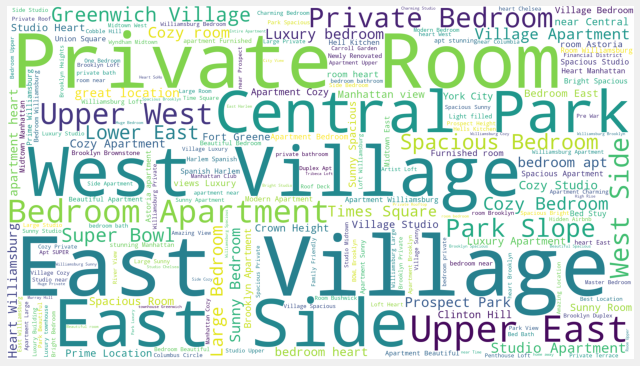

In [245]:
from wordcloud import WordCloud

plt.subplots(figsize=(10,10))
#wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(raw_data[raw_data.price > raw_data.price.mean()*2].name.fillna('None')))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(raw_data[raw_data.availability_365 < 2].modified_name))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [247]:
# words = wordcloud.words_

# def value_words(x) : 
#     keys = list(words.keys())
#     value = 0
#     for j in keys : 
#         if j in x :
#             value += words[j]
#     return value

# raw_data['name_values'] = raw_data.name.fillna('0').apply(lambda x : value_words(x))
# raw_data.name_values.corr(raw_data.price)

0.003017554490442683